In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import os 

In [364]:
df_1 = pd.read_csv("/Users/samirabr12/Downloads/Norway_CleanStandardized.csv", header=0, index_col=0)
df_well = pd.read_csv("/Users/samirabr12/Downloads/Norway.csv")
#Merge the 2 CSVs by API number
df_merged = df_well.merge(df_1, how = "left", on = "Name")
print(df_merged.head())

   Unnamed: 0    Name               Surface        X_x         Y_x       Z  \
0       21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
1       21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
2       21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
3       21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
4       21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   

       MD  Geological age  TVT  TST  ... Unnamed: 12  Unnamed: 13  \
0  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
1  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
2  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
3  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
4  1382.0            4.21  NaN  NaN  ...         NaN          NaN   

   Unnamed: 14  Unnamed: 15  Unnamed: 16        X_y         Y_y  \
0          NaN          NaN          NaN  628531.

In [365]:
df_merged.head()

,Unnamed: 0,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.27,6394713.59,-23910.88,0.077844,-1.060102


In [366]:
df_holdout = df_merged.sample(frac=0.2, random_state=4242001)
#make list of API numbers that we held out
heldout_APIs = []
for i in df_holdout["Name"]:
    heldout_APIs.append(i)
#now we need to go back to our original Dataframe and set the vals we are holding out to 0
print(df_holdout.head())
df_merged_heldout = df_merged.copy()
df_merged_heldout.iloc[2933, 6] = 0
df_merged_heldout.iloc[2439, 6] = 0
df_merged_heldout.iloc[3298, 6] = 0
df_merged_heldout.iloc[542, 6] = 0
df_merged_heldout.iloc[5466, 6] = 0

        Unnamed: 0        Name            Surface        X_x         Y_x  \
217802       18224  30/3-7 ST2       Cook Fm. Top  494442.06  6738748.59   
22693         1872      15/3-6  HORDALAND GP. Top  427953.32  6515614.84   
177567       17746    25/6-4 S      Skade Fm. Top  493457.44  6616625.75   
262069        3283      30/9-7     Roedby Fm. Top  486338.03  6698145.39   
64140         6165     16/1-12      Lista Fm. Top  457489.40  6518854.62   

              Z      MD  Geological age  TVT  TST  ... Unnamed: 12  \
217802 -5082.00  5138.0          188.00  NaN  NaN  ...         NaN   
22693   -885.00   910.0           13.00  NaN  NaN  ...         NaN   
177567 -1167.89  1197.0            1.00  NaN  NaN  ...         NaN   
262069 -2745.00  2768.0           98.90  NaN  NaN  ...         NaN   
64140  -1751.95  1777.0            1.77  NaN  NaN  ...         NaN   

        Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16        X_y  \
217802          NaN          NaN          NaN    

In [367]:
df_merged.rename(columns={"True Vertical Depth": "TVD"})

,Unnamed: 0,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,X_y,Y_y,TVD,Normalized TVD,Formation
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,628531.27,6394713.59,-23910.88,0.077844,-1.060102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484299,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,580466.31,6356474.78,-20080.50,0.226400,-0.631959
484300,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,580466.31,6356474.78,-18944.50,0.270458,-0.593036
484301,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,580466.31,6356474.78,-20622.50,0.205379,-0.554114
484302,18872,9/8-1,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,580466.31,6356474.78,-20662.50,0.203828,-0.515192


In [368]:
df_merged['True Vertical Depth'] = df_merged['True Vertical Depth'] - df_merged['True Vertical Depth'].min()

In [369]:
D_df = df_merged.pivot_table('True Vertical Depth',"Formation","Name").fillna(0)
df_merged[["True Vertical Depth", "Formation", "Name"]]

,True Vertical Depth,Formation,Name
0,2892.10,-1.215791,10/4-1
1,2907.10,-1.176869,10/4-1
2,2880.10,-1.137946,10/4-1
3,2856.10,-1.099024,10/4-1
4,2007.12,-1.060102,10/4-1
...,...,...,...
484299,5837.50,-0.631959,9/8-1
484300,6973.50,-0.593036,9/8-1
484301,5295.50,-0.554114,9/8-1
484302,5255.50,-0.515192,9/8-1


In [370]:
D_df

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2892.10,4073.0,11236.12,3308.0,5606.65,4450.07,0.0,21744.44,21541.85,21544.0,...,8552.050,8345.24,6506.31,6284.11,5674.0,5448.0,5506.0,5564.0,5443.05,5448.5
-1.176869,2907.10,4067.0,0.00,3319.0,5593.65,0.00,0.0,21731.44,21533.85,21537.0,...,8541.050,8350.24,6499.31,0.00,5690.0,5446.0,5508.0,5570.0,0.00,5456.5
-1.137946,2880.10,4031.0,0.00,3303.0,0.00,4400.09,0.0,0.00,0.00,0.0,...,8525.410,8300.65,6478.32,6292.11,5673.0,5421.0,5470.0,5522.0,0.00,0.0
-1.099024,2856.10,3981.0,0.00,3185.0,5593.65,4110.11,0.0,0.00,21523.63,21544.0,...,8420.670,8250.06,6387.34,6185.13,5645.0,5399.0,5392.0,5409.0,0.00,5388.5
-1.060102,2007.12,3635.0,10730.19,0.0,0.00,3549.12,0.0,21606.45,21360.97,21380.0,...,6961.305,6886.74,5575.75,4703.39,5201.0,4909.0,4974.0,4704.0,4747.11,5147.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.871034,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.909956,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.948878,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [371]:
#actual depth values
actual = D_df.values
#reshape values (for actual values)
actual = actual.reshape(121000, 1)
#train normalization
scaler = StandardScaler()
scaler = scaler.fit(actual)

In [372]:
mms = MinMaxScaler()
R = D_df.values
target_vals = df_holdout["True Vertical Depth"]
well_depth_mean = np.mean(R, axis = 1)
R_normalize = mms.fit_transform(R, target_vals)
R_demeaned = R - well_depth_mean.reshape(-1, 1)

In [373]:
from sklearn.preprocessing import binarize
A = binarize(R)

In [374]:
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    MAE = []
    for i in range(1, n_factors):
        lambda_ = lambda_
        n_factors = i
        n, m = A.shape
        n_iterations = n_iterations
        Users = 5 * np.random.rand(n, n_factors)
        Items = 5 * np.random.rand(n_factors, m)

        def get_error(A, Users, Items, R):
            # This calculates the MSE of nonzero elements
            return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

        MSE_List = []

        print("Starting Iterations")
        for iter in range(n_iterations):
            for i, Ri in enumerate(R):
                Users[i] = np.linalg.solve(
                    np.dot(Items, np.dot(np.diag(Ri), Items.T))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
                    ).T
            print(
                "Error after solving for User Matrix:",
                get_error(A, Users, Items, R),
                )

            for j, Rj in enumerate(R.T):
                Items[:, j] = np.linalg.solve(
                    np.dot(Users.T, np.dot(np.diag(Rj), Users))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
                    )
            print(
                "Error after solving for Item Matrix:",
                 get_error(A, Users, Items, R),
                )

            MSE_List.append(get_error(A, Users, Items, R))
            print("%sth iteration is complete..." % iter)
        MAE.append(MSE_List)
    return Users, Items, MAE

In [375]:
U, Vt, M_list = runALS(R_normalize, A, 20, 5, 0.1)

Initiating 
Starting Iterations
Error after solving for User Matrix: 0.18456936690701214
Error after solving for Item Matrix: 0.009449923670389406
0th iteration is complete...
Error after solving for User Matrix: 0.004647857298237402
Error after solving for Item Matrix: 0.007327559111252533
1th iteration is complete...
Error after solving for User Matrix: 0.004333049572992152
Error after solving for Item Matrix: 0.0065242925981762335
2th iteration is complete...
Error after solving for User Matrix: 0.004201194624564578
Error after solving for Item Matrix: 0.005972894014315219
3th iteration is complete...
Error after solving for User Matrix: 0.004108104315836621
Error after solving for Item Matrix: 0.005567575540741548
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 0.11737824105971463
Error after solving for Item Matrix: 0.014448083604127452
0th iteration is complete...
Error after solving for User Matrix: 0.004906669688801466
Error after solving f

In [376]:
MAE_max = []
#get a list of the max errors from each value of n_factor
for i in M_list:
    MAE_max.append(max(i))
#The index of the minimum max error is the optimal n_factor value
print(MAE_max.index(min(MAE_max)))

0


In [377]:
recommendations = np.dot(U, Vt)
recsys = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)
recsys.head()

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,0.710749,0.837344,0.897369,0.762900,0.797972,0.897771,0.390195,0.892849,0.900205,0.885631,...,0.860244,0.828961,0.890959,0.858941,0.770501,0.751451,0.753885,0.760849,0.715992,0.766307
-1.176869,0.688600,0.813870,0.869000,0.748324,0.791146,0.889583,0.381920,0.870235,0.878079,0.863833,...,0.847057,0.816855,0.872793,0.842734,0.759078,0.741443,0.742891,0.751715,0.689624,0.765985
-1.137946,0.656979,0.792939,0.850587,0.724503,0.763315,0.882704,0.396606,0.822583,0.816919,0.816488,...,0.824690,0.793507,0.852478,0.814924,0.744156,0.722992,0.724500,0.726950,0.650989,0.742908
-1.099024,0.673937,0.799125,0.874393,0.736412,0.781427,0.889264,0.403388,0.872142,0.877936,0.865289,...,0.841166,0.810416,0.867780,0.828916,0.753544,0.733375,0.734690,0.741727,0.680909,0.755930
-1.060102,0.515701,0.748378,0.902043,0.734496,0.782267,0.807928,0.394797,0.851910,0.844122,0.841422,...,0.746742,0.720594,0.805044,0.695196,0.725681,0.697067,0.701711,0.672237,0.658599,0.749020


In [378]:
#predicted values
predicted = recsys.values

In [379]:
#normalize dataset
normalized_actual = scaler.transform(actual)
#inverse transform to original values and print values
inversed_actual = scaler.inverse_transform(normalized_actual)
for i in range(5):
    print(inversed_actual[i])

[2892.1]
[4073.]
[11236.12]
[3308.]
[5606.65]


In [380]:
#inverse transformation and print values
inversed_predicted = scaler.inverse_transform(predicted)
for i in range(5):
    print(inversed_predicted[i])

[6167.89999454 6870.91306197 7204.2520794  ... 6446.11524983 6197.01282606
 6476.42719562]
[6044.89758506 6740.55669606 7046.71132302 ... 6395.3917029  6050.58595007
 6474.63699531]
[5869.29602764 6624.32061287 6944.45753234 ... 6257.86810017 5836.03588366
 6346.48774584]
[5963.47120079 6658.67284837 7076.6601486  ... 6339.92519444 6002.18686192
 6418.80038768]
[5084.74104375 6376.85939505 7230.20313399 ... 5954.03207965 5878.29494912
 6380.42747846]


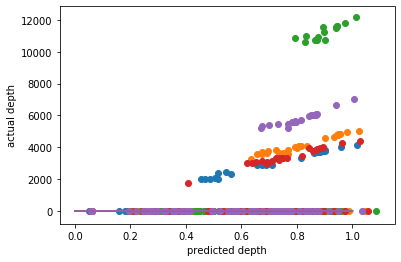

In [394]:
for i in range(5):
    plt.scatter(recsys.iloc[0:, i].values, D_df.iloc[0:, i].values) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys.iloc[0:,i].max()))

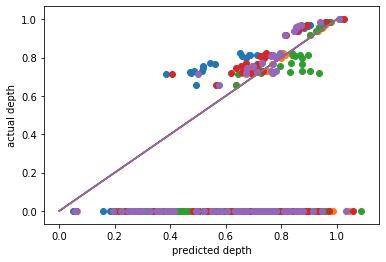

In [395]:
D_df_normalized = mms.fit_transform(D_df.iloc[0:, 1].values.reshape(-1,1))
for i in range(5):
    plt.scatter(recsys.iloc[0:, i].values, D_df_normalized) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0, recsys.iloc[0:,i].max()))

In [383]:
recsys.head()

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,0.710749,0.837344,0.897369,0.762900,0.797972,0.897771,0.390195,0.892849,0.900205,0.885631,...,0.860244,0.828961,0.890959,0.858941,0.770501,0.751451,0.753885,0.760849,0.715992,0.766307
-1.176869,0.688600,0.813870,0.869000,0.748324,0.791146,0.889583,0.381920,0.870235,0.878079,0.863833,...,0.847057,0.816855,0.872793,0.842734,0.759078,0.741443,0.742891,0.751715,0.689624,0.765985
-1.137946,0.656979,0.792939,0.850587,0.724503,0.763315,0.882704,0.396606,0.822583,0.816919,0.816488,...,0.824690,0.793507,0.852478,0.814924,0.744156,0.722992,0.724500,0.726950,0.650989,0.742908
-1.099024,0.673937,0.799125,0.874393,0.736412,0.781427,0.889264,0.403388,0.872142,0.877936,0.865289,...,0.841166,0.810416,0.867780,0.828916,0.753544,0.733375,0.734690,0.741727,0.680909,0.755930
-1.060102,0.515701,0.748378,0.902043,0.734496,0.782267,0.807928,0.394797,0.851910,0.844122,0.841422,...,0.746742,0.720594,0.805044,0.695196,0.725681,0.697067,0.701711,0.672237,0.658599,0.749020
